<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Titanic_surviver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Datasets

In [36]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.shape

(891, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Deal with missing values

In [39]:
df = df.drop(columns='Cabin', axis=1)

In [40]:
avg_age = df['Age'].mean().astype(int)
avg_age

29

In [41]:
df['Age'].fillna(avg_age, inplace=True)

In [42]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
df.fillna('S', inplace=True)

#Data analysis

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Encoding

In [45]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [46]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


#Correlation

In [54]:
df.corr()['Survived']

<ipython-input-54-57d70bb92b5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.067814
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Name: Survived, dtype: float64

<ipython-input-55-2de6973283e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True, fmt='.2f')


<Axes: >

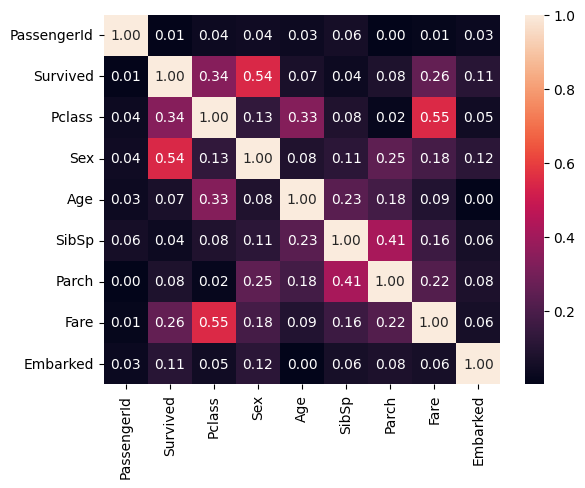

In [55]:
sns.heatmap(df.corr().abs(), annot=True, fmt='.2f')

#Data Visulization

In [48]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

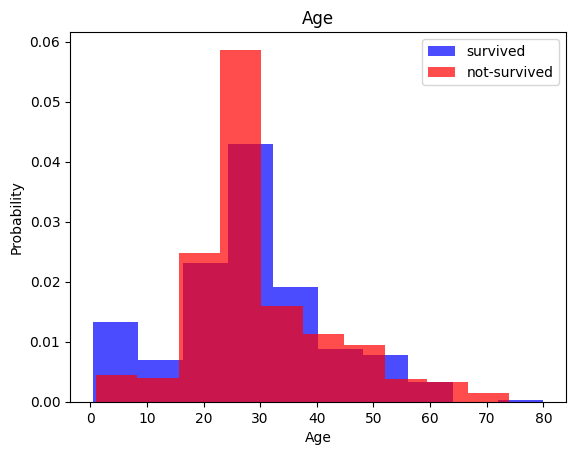

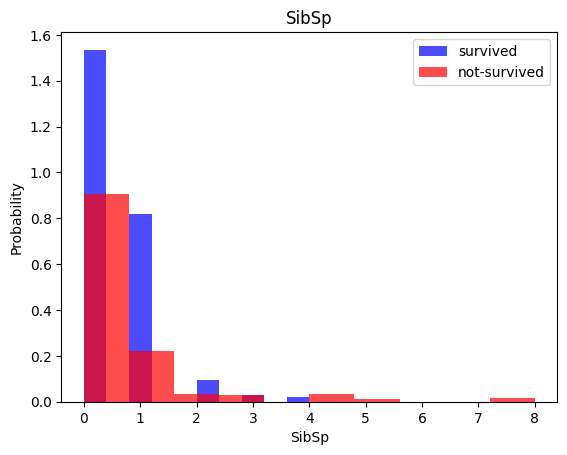

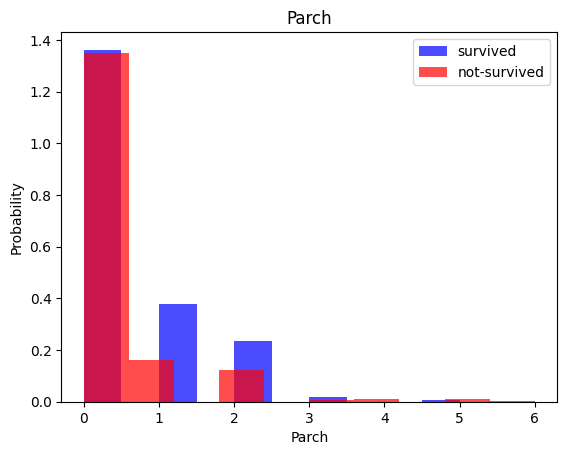

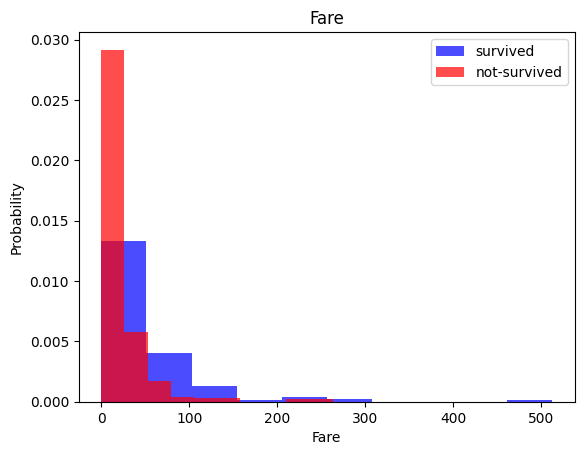

In [49]:
for col in df_num.columns:
  plt.hist(df[df['Survived']==1][col], color='blue', label='survived', alpha=0.7, density=True)
  plt.hist(df[df['Survived']==0][col], color='red', label='not-survived', alpha=0.7, density=True)
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

<Axes: xlabel='Survived', ylabel='count'>

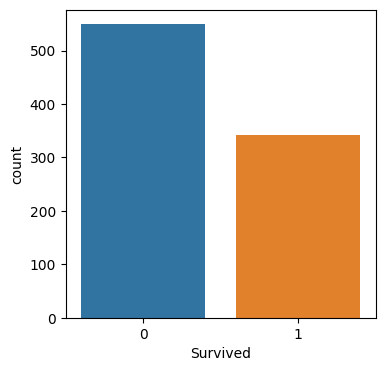

In [57]:
plt.figure(figsize=(4, 4))
sns.countplot(x=df['Survived'], data=df)

<Axes: xlabel='Pclass', ylabel='count'>

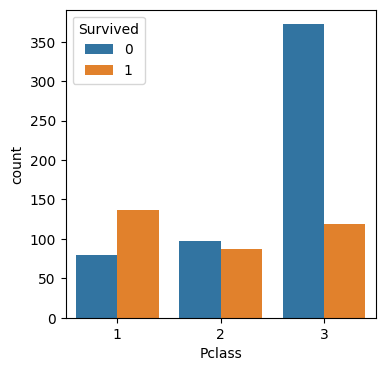

In [66]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Pclass'], hue='Survived', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

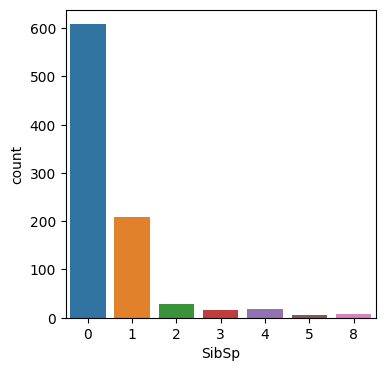

In [61]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['SibSp'], data=df)

<Axes: xlabel='Parch', ylabel='count'>

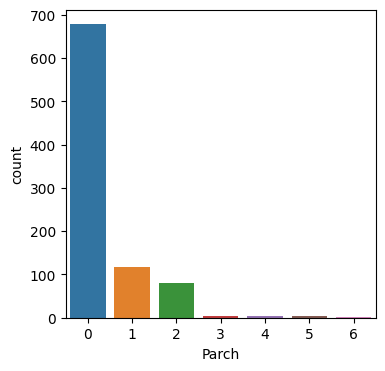

In [62]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Parch'], data=df)

<Axes: xlabel='Sex', ylabel='count'>

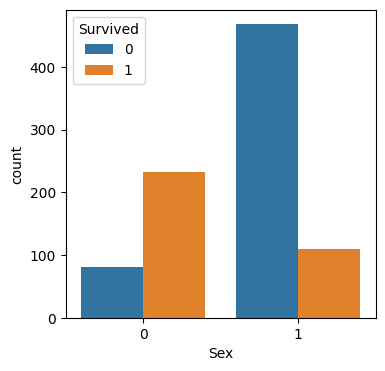

In [65]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Sex'], hue='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

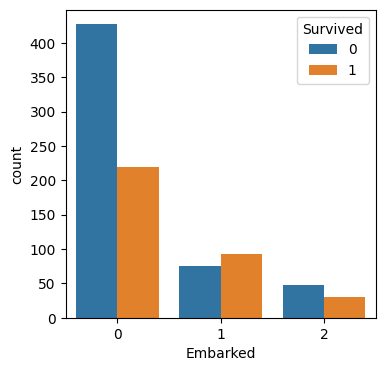

In [67]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Embarked'], hue='Survived', data=df)

#Normalization

In [74]:
def scale_dataset(dataframe, oversample=False):
  x = df.drop(columns = ['PassengerId', 'Name', 'Ticket'], axis=1).values
  y = df['Survived'].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    over = RandomOverSampler()
    x, y = over.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

#Train/Test/Validatin

In [75]:
train, test, valid = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [76]:
train, x_train, y_train = scale_dataset(train, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=False)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)

#KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred = knn.predict(x_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       0.99      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



#Logistic

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [83]:
y_pred = log.predict(x_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891

